In [176]:
import pandas as pd
import numpy as np
import yfinance as yf
from pyhhmm.gaussian import GaussianHMM
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [177]:
yf.pdr_override()

In [339]:
start_date = '2019-01-01'
end_data = '2024-04-01'
symbol = 'SPY'

In [340]:
data = pdr.get_data_yahoo(symbol, start = start_date,end = end_data)

[*********************100%%**********************]  1 of 1 completed


In [341]:
data=data[['Open','High','Low','Adj Close','Volume']]

In [342]:
# Add Returns and Range
df = data.copy()
df['Returns'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
df['Range'] = (df['High']/df['Low']) - 1
df.dropna(inplace = True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2019-01-03,248.229996,248.570007,243.669998,224.358627,144140700,-0.023863,0.020109
2019-01-04,247.589996,253.110001,247.169998,231.873657,142628800,0.033496,0.024032
2019-01-07,252.690002,255.949997,251.690002,233.701935,103139100,0.007885,0.016926
2019-01-08,256.820007,257.309998,254.000000,235.897659,102512600,0.009395,0.013031
2019-01-09,257.559998,258.910004,256.190002,237.000107,95006600,0.004673,0.010617


In [343]:
#Add Moving Average
df['MA_12'] = df['Adj Close'].rolling(window = 12).mean()
df['MA_21'] = df['Adj Close'].rolling(window = 21).mean()
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range,MA_12,MA_21
Date,,,,,,,,,
2019-01-03,248.229996,248.570007,243.669998,224.358627,144140700,-0.023863,0.020109,NaN,NaN
2019-01-04,247.589996,253.110001,247.169998,231.873657,142628800,0.033496,0.024032,NaN,NaN
2019-01-07,252.690002,255.949997,251.690002,233.701935,103139100,0.007885,0.016926,NaN,NaN
2019-01-08,256.820007,257.309998,254.000000,235.897659,102512600,0.009395,0.013031,NaN,NaN
2019-01-09,257.559998,258.910004,256.190002,237.000107,95006600,0.004673,0.010617,NaN,NaN


In [344]:
df.iloc[10:,:]

,Open,High,Low,Adj Close,Volume,Returns,Range,MA_12,MA_21
Date,,,,,,,,,
2019-01-17,260.010010,263.920013,259.959991,241.584473,96118400,0.007587,0.015233,NaN,NaN
2019-01-18,264.980011,266.980011,263.000000,244.799973,127900300,0.013310,0.015133,236.700756,NaN
2019-01-22,264.820007,265.059998,261.059998,241.492599,115531200,-0.013511,0.015322,238.128587,NaN
2019-01-23,264.010010,264.790009,260.660004,241.997910,86030300,0.002092,0.015844,238.972275,NaN
2019-01-24,263.209991,264.200012,262.079987,242.126480,59204100,0.000531,0.008089,239.674320,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-22,522.109985,522.609985,520.969971,521.210022,79023000,-0.001896,0.003148,514.853572,511.488351
2024-03-25,519.799988,520.950012,519.609985,519.770020,48512100,-0.002763,0.002579,515.399790,512.130877
2024-03-26,521.229980,521.580017,518.400024,518.809998,65463700,-0.001847,0.006134,516.122709,512.815985


In [345]:
#Structure Data
X_train = df[['Returns','Range']].iloc[:500]
X_test = df[['Returns','Range']].iloc[500:]

save_df = df.iloc[500:]
print('Train Length: ', len(X_train))
print('Test Length: ', len(X_test))
print("X_Train_From: ", X_train.head(1).index.item())
print("X_Train_To: ", X_train.tail(1).index.item())
print("X_Test_From: ", X_test.head(1).index.item())
print("X_Test_To: ", X_test.tail(1).index.item())


Train Length:  500
Test Length:  818
X_Train_From:  2019-01-03 00:00:00
X_Train_To:  2020-12-24 00:00:00
X_Test_From:  2020-12-28 00:00:00
X_Test_To:  2024-03-28 00:00:00


### Train HMM

In [346]:
model = GaussianHMM(n_states = 4, covariance_type = 'full', n_emissions = 2)
model.train([np.array(X_train.values)])
model.predict([X_test.values])[0][:10]

/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int32)

In [347]:
X_test.values

array([[ 0.00859089,  0.00409623],
       [-0.00190786,  0.00854843],
       [ 0.00142663,  0.00411766],
       ...,
       [-0.00184701,  0.00613424],
       [ 0.00840382,  0.00716093],
       [-0.0001911 ,  0.00350043]])

In [348]:
#Make prediction on Test Data
df_main = save_df.copy()
df_main.drop(columns=['High','Low'],inplace = True)

hmm_results = model.predict([X_test.values])[0]
df_main['HMM'] = hmm_results
df_main.head()


,Open,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM
Date,,,,,,,,
2020-12-28,371.739990,354.897644,39000400,0.008591,0.004096,350.709028,349.672782,3
2020-12-29,373.809998,354.220551,53680500,-0.001908,0.008548,351.208598,350.096611,0
2020-12-30,372.339996,354.725891,49455300,0.001427,0.004118,351.784304,350.617302,1
2020-12-31,371.779999,356.528259,78520700,0.005081,0.009240,352.639979,351.044766,0
2021-01-04,375.309998,351.674500,110210800,-0.013614,0.029138,352.701073,351.206283,1


### Run Backtest

In [349]:
#Add MA Signals

df_main.loc[df_main['MA_12']>df_main['MA_21'],"MA_Signal"] = 1
df_main.loc[df_main['MA_12']<=df_main['MA_21'],"MA_Signal"] = 0


In [350]:
df_main.head(5)

,Open,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_Signal
Date,,,,,,,,,
2020-12-28,371.739990,354.897644,39000400,0.008591,0.004096,350.709028,349.672782,3,1.0
2020-12-29,373.809998,354.220551,53680500,-0.001908,0.008548,351.208598,350.096611,0,1.0
2020-12-30,372.339996,354.725891,49455300,0.001427,0.004118,351.784304,350.617302,1,1.0
2020-12-31,371.779999,356.528259,78520700,0.005081,0.009240,352.639979,351.044766,0,1.0
2021-01-04,375.309998,351.674500,110210800,-0.013614,0.029138,352.701073,351.206283,1,1.0


In [351]:
df

,Open,High,Low,Adj Close,Volume,Returns,Range,MA_12,MA_21
Date,,,,,,,,,
2019-01-03,248.229996,248.570007,243.669998,224.358627,144140700,-0.023863,0.020109,NaN,NaN
2019-01-04,247.589996,253.110001,247.169998,231.873657,142628800,0.033496,0.024032,NaN,NaN
2019-01-07,252.690002,255.949997,251.690002,233.701935,103139100,0.007885,0.016926,NaN,NaN
2019-01-08,256.820007,257.309998,254.000000,235.897659,102512600,0.009395,0.013031,NaN,NaN
2019-01-09,257.559998,258.910004,256.190002,237.000107,95006600,0.004673,0.010617,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-22,522.109985,522.609985,520.969971,521.210022,79023000,-0.001896,0.003148,514.853572,511.488351
2024-03-25,519.799988,520.950012,519.609985,519.770020,48512100,-0.002763,0.002579,515.399790,512.130877
2024-03-26,521.229980,521.580017,518.400024,518.809998,65463700,-0.001847,0.006134,516.122709,512.815985


In [396]:
# Add HMM Signals

favourable_state = [1]
hmm_values = df_main['HMM'].values
hmm_values = [1 if x in favourable_state else 0 for x in hmm_values]
df_main['HMM_Signal'] = hmm_values


In [397]:
# Add Combined Signal

df_main['Main_Signal'] = 0
df_main.loc[(df_main['MA_Signal'] == 1) & (df_main['HMM_Signal']==1),'Main_Signal'] = 1
df_main['Main_Signal'] = df_main['Main_Signal'].shift(1)

In [398]:
# Benchmark Return
df_main["lrets_bench"] = np.log(df_main['Adj Close']/df_main['Adj Close'].shift(1))
df_main['bench_prod'] = df_main['lrets_bench'].cumsum()
df_main['bench_prod_exp'] = np.exp(df_main['bench_prod']) - 1

In [399]:
# Strategy Returns
df_main["lrets_strat"] = np.log(df_main['Open'].shift(-1)/df_main['Open']) * df_main['Main_Signal']
df_main['lrets_prod'] = df_main['lrets_strat'].cumsum()
df_main['strat_prod_exp'] = np.exp(df_main['lrets_prod']) - 1

In [400]:
# Review Results Table
df_main.dropna(inplace = True)
df_main.head(40)

,Open,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_Signal,HMM_Signal,Main_Signal,lrets_bench,bench_prod,bench_prod_exp,lrets_strat,lrets_prod,strat_prod_exp
Date,,,,,,,,,,,,,,,,,
2021-01-05,368.100006,354.096619,66426200,0.006887,0.012091,352.918114,351.487656,0,1.0,0,1.0,0.006864,0.006864,0.006887,0.004364,0.004364,0.004374
2021-01-06,369.709991,356.213562,107997700,0.005978,0.021294,353.147774,351.726956,1,1.0,1,0.0,0.005961,0.012824,0.012907,0.000000,0.004364,0.004374
2021-01-07,376.100006,361.505981,68766800,0.014857,0.010614,353.936073,352.252642,1,1.0,1,1.0,0.014748,0.027573,0.027956,0.011868,0.016232,0.016364
2021-01-08,380.589996,363.565765,71677200,0.005698,0.011641,355.000916,352.827577,0,1.0,0,1.0,0.005682,0.033254,0.033813,-0.007225,0.009006,0.009047
2021-01-11,377.850006,361.114990,51034700,-0.006741,0.007572,355.910797,353.435926,1,1.0,1,0.0,-0.006764,0.026490,0.026844,0.000000,0.009006,0.009047
2021-01-12,378.890015,361.191254,52547700,0.000211,0.009300,356.800812,354.053333,0,1.0,0,1.0,0.000211,0.026702,0.027061,-0.000528,0.008478,0.008514
2021-01-13,378.690002,362.163940,45303600,0.002693,0.007966,357.658246,354.736501,1,1.0,1,0.0,0.002689,0.029391,0.029827,0.000000,0.008478,0.008514
2021-01-14,380.589996,360.895660,49989100,-0.003502,0.008014,358.158081,355.433430,0,1.0,0,1.0,-0.003508,0.025883,0.026221,-0.010220,-0.001742,-0.001741
2021-01-15,376.720001,358.263824,107160000,-0.007293,0.010383,358.495021,355.782118,1,1.0,1,0.0,-0.007319,0.018564,0.018737,0.000000,-0.001742,-0.001741


In [401]:
df_main.tail(40)

,Open,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_Signal,HMM_Signal,Main_Signal,lrets_bench,bench_prod,bench_prod_exp,lrets_strat,lrets_prod,strat_prod_exp
Date,,,,,,,,,,,,,,,,,
2024-01-25,487.579987,486.518372,72525000,0.005439,0.006016,477.793808,475.035476,1,1.0,1,0.0,0.005424,0.324569,0.383434,0.000000,0.204150,0.226482
2024-01-26,487.589996,485.900299,76641600,-0.001270,0.005303,478.917816,475.593743,0,1.0,0,1.0,-0.001271,0.323297,0.381676,0.000287,0.204437,0.226834
2024-01-29,487.730011,489.748322,61322800,0.007919,0.008724,480.139852,476.294422,1,1.0,1,0.0,0.007888,0.331186,0.392618,0.000000,0.204437,0.226834
2024-01-30,490.559998,489.369537,58618400,-0.000773,0.003081,481.347768,476.968519,0,1.0,0,1.0,-0.000774,0.330412,0.391541,-0.003963,0.200474,0.221982
2024-01-31,488.619995,481.384338,126011100,-0.016317,0.012882,481.862836,477.327879,1,1.0,1,0.0,-0.016452,0.313960,0.368835,-0.000000,0.200474,0.221982
2024-02-01,484.630005,487.684753,91891600,0.013088,0.011224,483.048322,478.113534,1,1.0,1,1.0,0.013003,0.326963,0.386750,0.010305,0.210780,0.234640
2024-02-02,489.649994,492.818787,99147700,0.010527,0.013795,484.880961,479.326906,0,1.0,0,1.0,0.010472,0.337436,0.401349,0.008237,0.219017,0.244852
2024-02-05,493.700012,491.024353,75757100,-0.003641,0.008465,486.215149,480.526511,1,1.0,1,0.0,-0.003648,0.333788,0.396247,-0.000000,0.219017,0.244852
2024-02-06,493.519989,492.449951,55918600,0.002903,0.004613,487.174670,481.763620,0,1.0,0,1.0,0.002899,0.336687,0.400300,0.005597,0.224614,0.251839


### Calculate Metrics

In [402]:
#Sharpe Ratio Function
def sharpe_ratio(returns_series):
    N=255
    NSQRT = np.sqrt(N)
    rf = 0.01
    mean = returns_series.mean()*N
    
    sigma = returns_series.std()*NSQRT
   
    sharpe_ratio = round((mean - rf)/sigma, 2)
    return sharpe_ratio

In [403]:
# Metrics
bench_rets = round(df_main['bench_prod_exp'].values[-1]*100,1)
strat_rets = round(df_main['strat_prod_exp'].values[-1]*100,1)

bench_sharpe = sharpe_ratio(df_main['lrets_bench'].values)
strat_sharpe = sharpe_ratio(df_main['lrets_strat'].values)

In [404]:
#Print Metrics 
print(f"Returns Benchmark: {bench_rets}%")
print(f"Returns Strategy: {strat_rets}%")
print("--------------------------------")
print(f"Sharpe Benchmark: {bench_sharpe}")
print(f"Sharpe Strategy: {strat_sharpe}")



Returns Benchmark: 48.5%
Returns Strategy: 28.9%
--------------------------------
Sharpe Benchmark: 0.66
Sharpe Strategy: 0.77


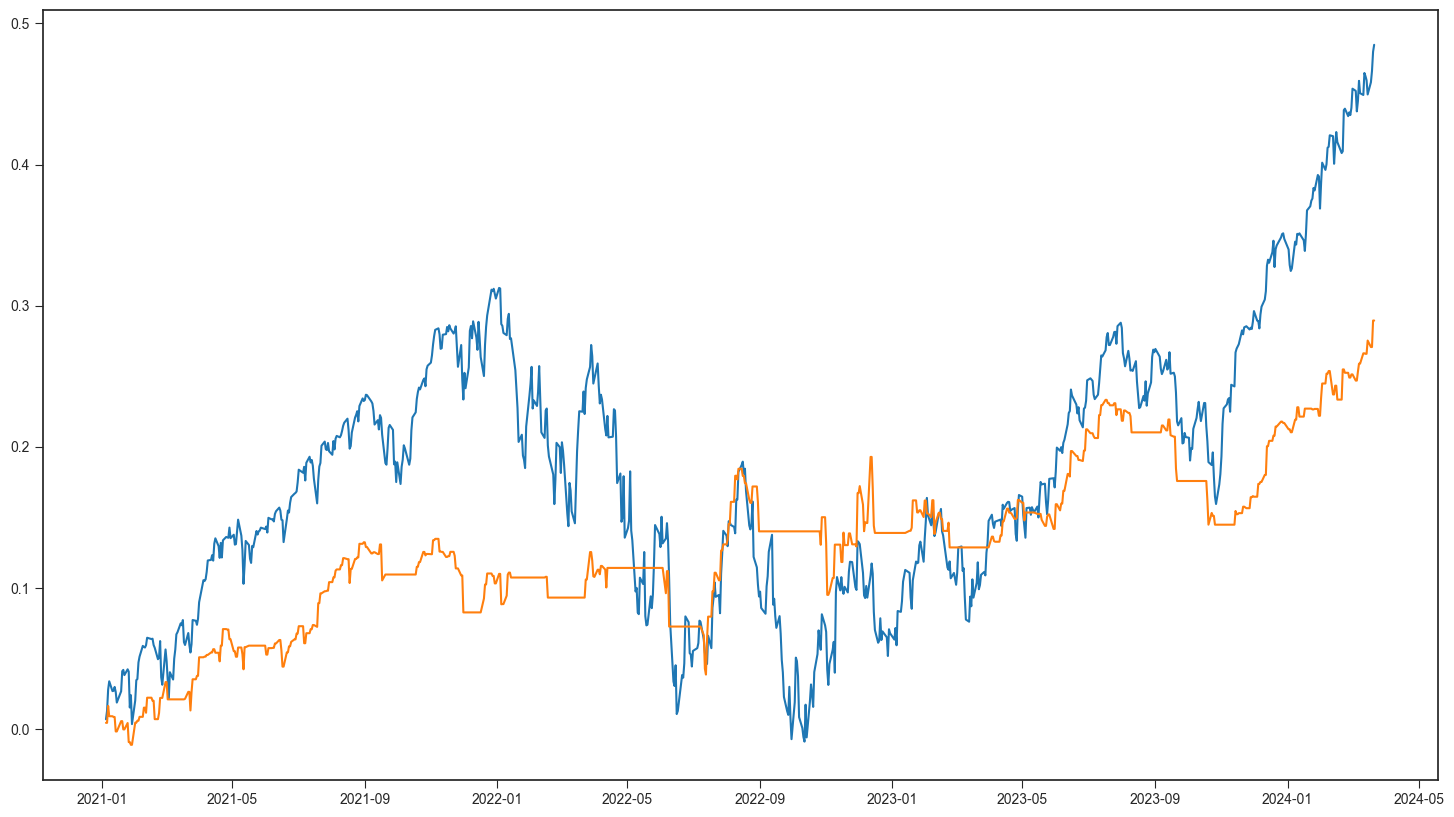

In [405]:
#Plot Equity Curves

fig = plt.figure(figsize = (18,10))
plt.plot(df_main['bench_prod_exp'])
plt.plot(df_main['strat_prod_exp'])
plt.show()

In [406]:
#Save Data
df_main.to_csv("HMM-SPY.csv")